In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
labels=['Normal_Classifier','Better_Classifier_Without_Randomness','Better_Classifier']
og=pd.read_csv('Test_Results/Original_Images/01_Original.csv') #Insert the path to the 01_Original.csv file
def Results(x):
    df=pd.read_csv(x)
    Normal_Classifier={}
    Better_Classifier_Without_Randomness={}
    Better_Classifier={}
    classifiers=[Normal_Classifier,Better_Classifier_Without_Randomness,Better_Classifier]
    i=0
    for name in df.columns:
        if 'CONF' in name:
            classifiers[i]['confidence']=df[name].mean()
        if 'L_0' in name:
            classifiers[i]['L_0']=df[name].mean()
        if 'L_1' in name:
            classifiers[i]['L_1']=df[name].mean()
        if 'L_2' in name:
            classifiers[i]['L_2']=df[name].mean()
        if 'L_INF' in name:
            classifiers[i]['L_Inf']=df[name].mean()
        if 'RSLT' in name:
            try:
                classifiers[i]['accuracy']=dict(df[name].value_counts())[1]/df.shape[0]
            except KeyError:
                classifiers[i]['accuracy']=0
        if 'AI_RSLT' in name:
            if 'Untargeted' in x:
                cd=df
                if name=='NCAI_RSLT':
                    for j,k in enumerate(cd[name]):
                        if og['NCOI_RSLT'][j]==0:
                            cd[name][j]='NaN'
                elif name=='BCNRAI_RSLT':
                    for j,k in enumerate(cd[name]):
                        if og['BCNROI_RSLT'][j]==0:
                            cd[name][j]='NaN'
                if name=='BCAI_RSLT':
                    for j,k in enumerate(cd[name]):
                        if og['BCOI_RSLT'][j]==0:
                            cd[name][j]='NaN'
                classifiers[i]['attack_success']=dict(cd[name].value_counts())[0]/cd.shape[0]
            else:    
                classifiers[i]['attack_success']=dict(df[name].value_counts())[-1]/df.shape[0]
        if 'TIME' in name:
            classifiers[i]['time']=df[name].mean()
            i+=1    
    print('\n',labels[0],':\n',Normal_Classifier,'\n',labels[1],':\n',Better_Classifier_Without_Randomness,'\n',labels[2],':\n',Better_Classifier)
    return Normal_Classifier,Better_Classifier_Without_Randomness,Better_Classifier
    
def graph(result,keys):
    if len(keys)==1:
        y = []
        for i in result:
            y.append(i[keys[0]])
        plt.bar(labels,y)
        plt.xticks(rotation=15)
        plt.ylim(0,1)
        plt.title(keys[0])

    else:
        fig, axs = plt.subplots(1,len(keys),figsize=(15,5))
        for i,key in enumerate(keys):
            values = [d.get(key,None) for d in result]
            axs[i].bar(labels,values)        
            axs[i].set_ylim(0,1)
            axs[i].set_title(f'{key}')
            plt.setp(axs[i].get_xticklabels(), rotation=15, horizontalalignment='center')

    plt.show()


 Normal_Classifier :
 {'confidence': 0.801755999999975, 'accuracy': 0.7838, 'time': 0.014410594296455383} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.7408419999999822, 'accuracy': 0.6937, 'time': 0.380527929019928} 
 Better_Classifier :
 {'confidence': 0.7476359999999846, 'accuracy': 0.6997, 'time': 0.32786825907230377}


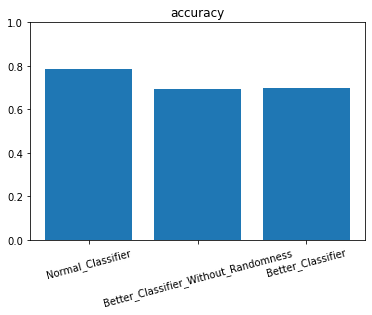

In [4]:
#10,000 Original samples
x=Results('Test_Results/Original_Images/01_Original.csv') #Replace with the respective path
graph(x,['accuracy'])


 Normal_Classifier :
 {'confidence': 0.9980000000000001, 'L_0': 78.07, 'L_1': 3.05, 'L_2': 3.01, 'L_Inf': 2.0, 'accuracy': 0.04, 'attack_success': 0.87, 'time': 0.015352106094360322} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.8397000000000001, 'L_0': 78.04, 'L_1': 3.05, 'L_2': 3.0, 'L_Inf': 2.0, 'accuracy': 0.39, 'attack_success': 0.49, 'time': 0.42843100786209104} 
 Better_Classifier :
 {'confidence': 0.8596, 'L_0': 78.03, 'L_1': 3.05, 'L_2': 3.0, 'L_Inf': 2.0, 'accuracy': 0.28, 'attack_success': 0.57, 'time': 0.3726059460639954}


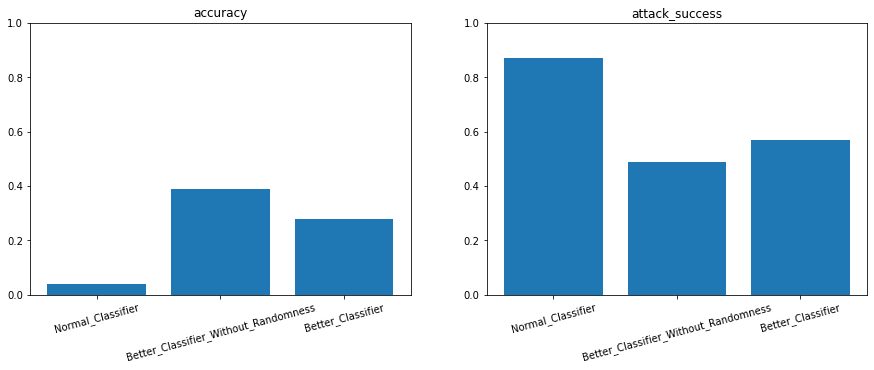

In [5]:
#100 Samples
x=Results('Test_Results/Over_100_Iterations/02_PGD_Untargeted_with_10_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.9915400000000003, 'L_0': 78.696, 'L_1': 3.0, 'L_2': 3.085, 'L_Inf': 2.0, 'accuracy': 0.048, 'attack_success': 0.829, 'time': 0.014486896514892574} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.8139800000000006, 'L_0': 78.622, 'L_1': 2.992, 'L_2': 3.08, 'L_Inf': 2.0, 'accuracy': 0.394, 'attack_success': 0.456, 'time': 0.4170598938465118} 
 Better_Classifier :
 {'confidence': 0.8346000000000028, 'L_0': 78.616, 'L_1': 2.993, 'L_2': 3.082, 'L_Inf': 2.0, 'accuracy': 0.314, 'attack_success': 0.502, 'time': 0.3602604057788849}


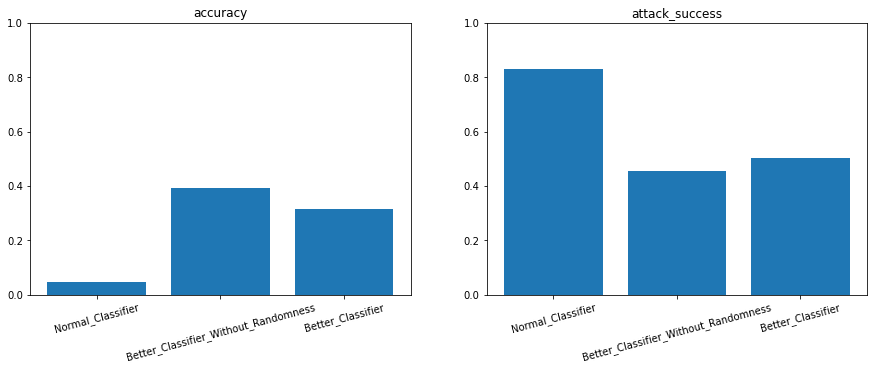

In [6]:
#1,000 Samples
x=Results('Test_Results/Over_1000_Iterations/02_PGD_Untargeted_with_10_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.9997999999999999, 'L_0': 89.54, 'L_1': 3.79, 'L_2': 3.57, 'L_Inf': 2.0, 'accuracy': 0.04, 'attack_success': 0.87, 'time': 0.016537234783172584} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.8362999999999997, 'L_0': 89.5, 'L_1': 3.77, 'L_2': 3.58, 'L_Inf': 2.0, 'accuracy': 0.4, 'attack_success': 0.49, 'time': 0.4374646019935608} 
 Better_Classifier :
 {'confidence': 0.8340999999999995, 'L_0': 89.54, 'L_1': 3.77, 'L_2': 3.58, 'L_Inf': 2.0, 'accuracy': 0.35, 'attack_success': 0.52, 'time': 0.36725664138793945}


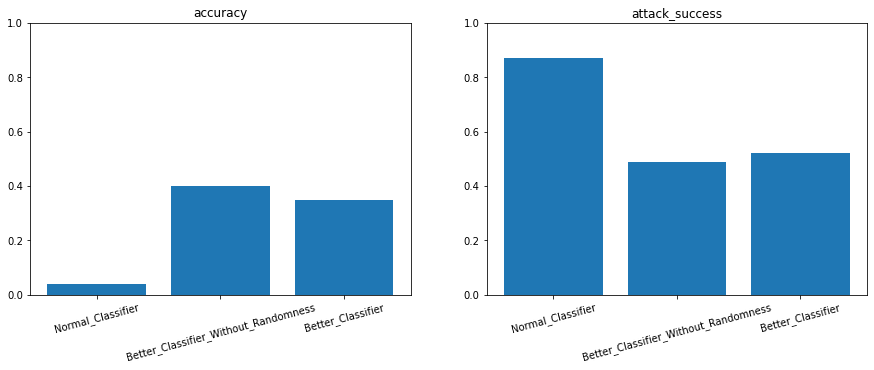

In [7]:
#100 Samples
x=Results('Test_Results/Over_100_Iterations/03_PGD_Untargeted_with_40_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.9968200000000002, 'L_0': 90.068, 'L_1': 3.729, 'L_2': 3.539, 'L_Inf': 2.0, 'accuracy': 0.048, 'attack_success': 0.829, 'time': 0.015497450113296505} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.8258000000000015, 'L_0': 90.04, 'L_1': 3.731, 'L_2': 3.536, 'L_Inf': 2.0, 'accuracy': 0.412, 'attack_success': 0.433, 'time': 0.4232797009944916} 
 Better_Classifier :
 {'confidence': 0.845090000000004, 'L_0': 90.053, 'L_1': 3.737, 'L_2': 3.534, 'L_Inf': 2.0, 'accuracy': 0.341, 'attack_success': 0.485, 'time': 0.35382274389266966}


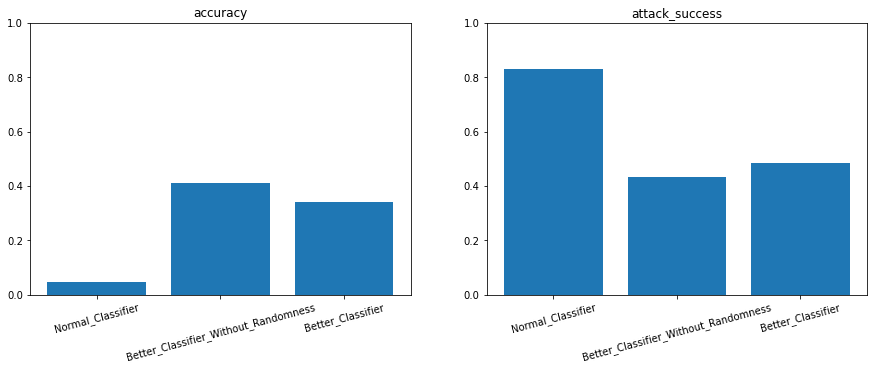

In [8]:
#1,000 Samples
x=Results('Test_Results/Over_1000_Iterations/03_PGD_Untargeted_with_40_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.9386999999999999, 'L_0': 76.68, 'L_1': 2.93, 'L_2': 2.91, 'L_Inf': 2.0, 'accuracy': 0.01, 'attack_success': 0.95, 'time': 0.017272171974182106} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.7180999999999997, 'L_0': 76.7, 'L_1': 2.91, 'L_2': 2.91, 'L_Inf': 2.0, 'accuracy': 0.71, 'attack_success': 0.03, 'time': 0.44503977775573733} 
 Better_Classifier :
 {'confidence': 0.7428999999999999, 'L_0': 76.71, 'L_1': 2.93, 'L_2': 2.92, 'L_Inf': 2.0, 'accuracy': 0.67, 'attack_success': 0.13, 'time': 0.3708366298675537}


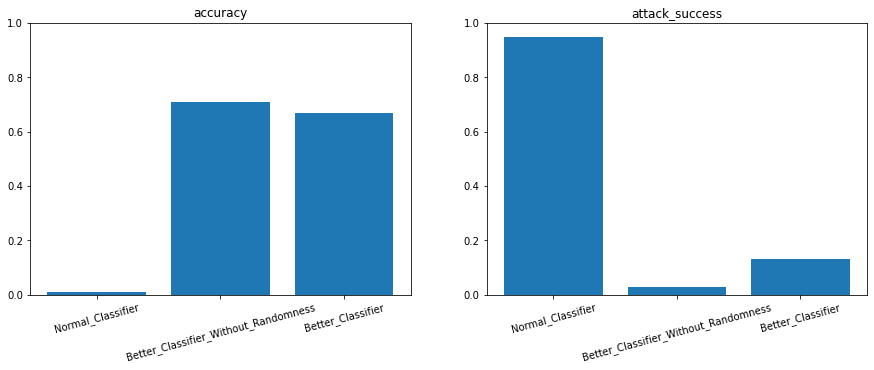

In [9]:
#100 Samples
x=Results('Test_Results/Over_100_Iterations/04_PGD_Targeted_with_10_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.9746400000000007, 'L_0': 77.104, 'L_1': 2.858, 'L_2': 2.946, 'L_Inf': 2.0, 'accuracy': 0.012, 'attack_success': 0.98, 'time': 0.015051809549331661} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.6782000000000006, 'L_0': 77.103, 'L_1': 2.862, 'L_2': 2.951, 'L_Inf': 2.0, 'accuracy': 0.589, 'attack_success': 0.101, 'time': 0.4280381000041962} 
 Better_Classifier :
 {'confidence': 0.7058100000000007, 'L_0': 77.097, 'L_1': 2.86, 'L_2': 2.948, 'L_Inf': 2.0, 'accuracy': 0.514, 'attack_success': 0.193, 'time': 0.36263011145591734}


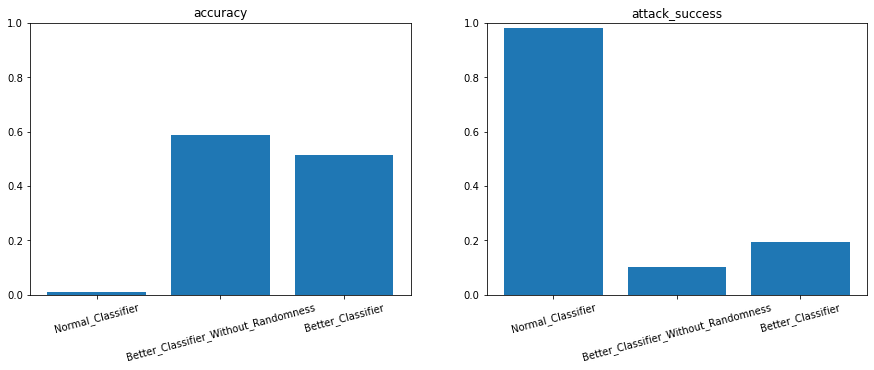

In [10]:
#1,000 Samples
x=Results('Test_Results/Over_1000_Iterations/04_PGD_Targeted_with_10_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.9958999999999999, 'L_0': 87.7, 'L_1': 3.39, 'L_2': 3.29, 'L_Inf': 2.0, 'accuracy': 0, 'attack_success': 1.0, 'time': 0.018116438388824433} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.7351000000000001, 'L_0': 87.71, 'L_1': 3.36, 'L_2': 3.29, 'L_Inf': 2.0, 'accuracy': 0.74, 'attack_success': 0.04, 'time': 0.4308731365203857} 
 Better_Classifier :
 {'confidence': 0.7626000000000002, 'L_0': 87.71, 'L_1': 3.38, 'L_2': 3.28, 'L_Inf': 2.0, 'accuracy': 0.7, 'attack_success': 0.14, 'time': 0.3684276819229126}


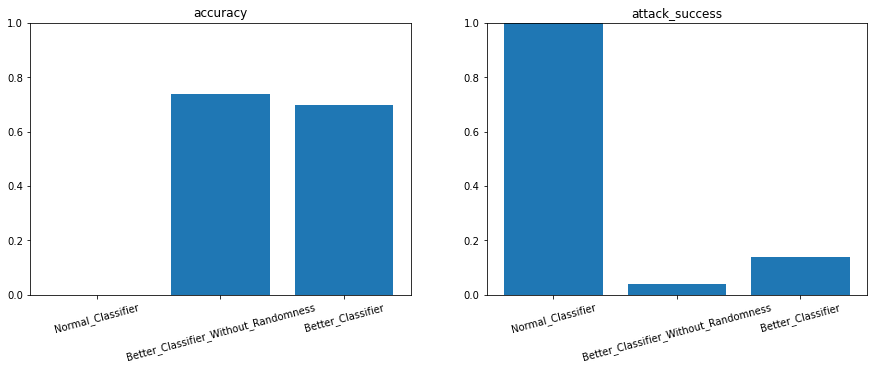

In [11]:
#100 Samples
x=Results('Test_Results/Over_100_Iterations/05_PGD_Targeted_with_40_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.9976900000000003, 'L_0': 88.006, 'L_1': 3.375, 'L_2': 3.284, 'L_Inf': 2.0, 'accuracy': 0.011, 'attack_success': 0.989, 'time': 0.01504823780059814} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.6906700000000016, 'L_0': 88.016, 'L_1': 3.371, 'L_2': 3.29, 'L_Inf': 2.0, 'accuracy': 0.595, 'attack_success': 0.099, 'time': 0.42552377700805666} 
 Better_Classifier :
 {'confidence': 0.704050000000001, 'L_0': 88.005, 'L_1': 3.368, 'L_2': 3.284, 'L_Inf': 2.0, 'accuracy': 0.569, 'attack_success': 0.162, 'time': 0.36561266136169435}


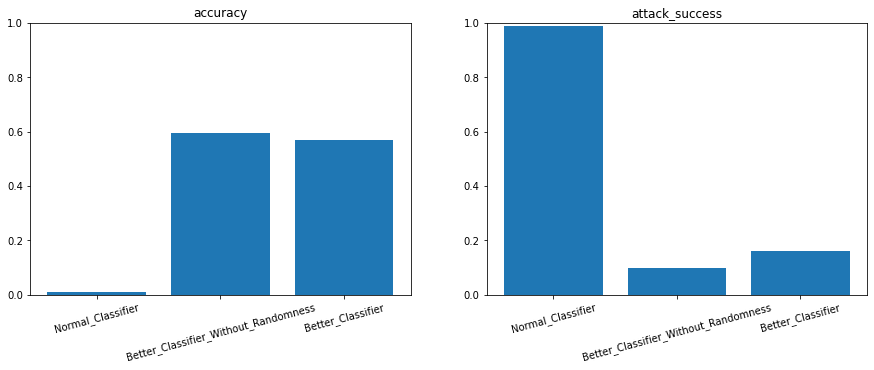

In [12]:
#1,000 Samples
x=Results('Test_Results/Over_1000_Iterations/05_PGD_Targeted_with_40_iterations.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.7413999999999998, 'L_0': 1.0, 'L_1': 1.0, 'L_2': 1.0, 'L_Inf': 1.0, 'accuracy': 0.54, 'attack_success': 0.4, 'time': 0.01579975128173826} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.7711999999999999, 'L_0': 1.0, 'L_1': 1.0, 'L_2': 1.0, 'L_Inf': 1.0, 'accuracy': 0.82, 'attack_success': 0.03, 'time': 0.42113709449768066} 
 Better_Classifier :
 {'confidence': 0.7755, 'L_0': 1.0, 'L_1': 1.0, 'L_2': 1.0, 'L_Inf': 1.0, 'accuracy': 0.78, 'attack_success': 0.05, 'time': 0.3826349925994873}


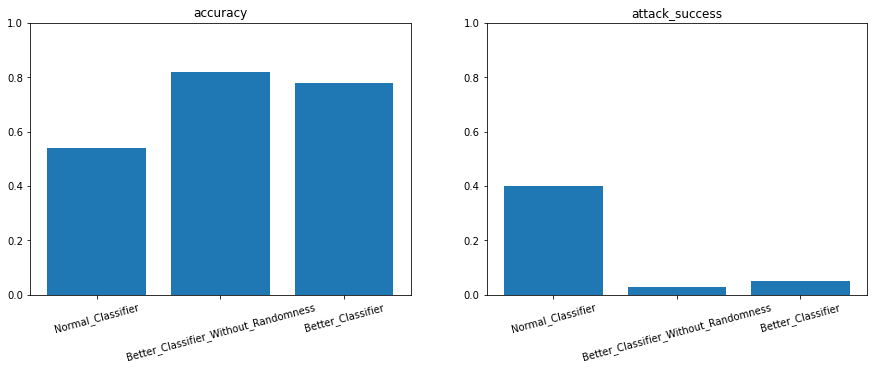

In [13]:
#100 Samples
x=Results('Test_Results/Over_100_Iterations/06_FGSM_Untargeted_with_0.3_eps.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.700760000000002, 'L_0': 1.0, 'L_1': 1.005, 'L_2': 1.001, 'L_Inf': 1.0, 'accuracy': 0.526, 'attack_success': 0.372, 'time': 0.015704670906066892} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.7187300000000012, 'L_0': 1.0, 'L_1': 1.005, 'L_2': 1.001, 'L_Inf': 1.0, 'accuracy': 0.701, 'attack_success': 0.068, 'time': 0.42178974390029905} 
 Better_Classifier :
 {'confidence': 0.730510000000002, 'L_0': 1.0, 'L_1': 1.005, 'L_2': 1.001, 'L_Inf': 1.0, 'accuracy': 0.698, 'attack_success': 0.091, 'time': 0.36896158480644226}


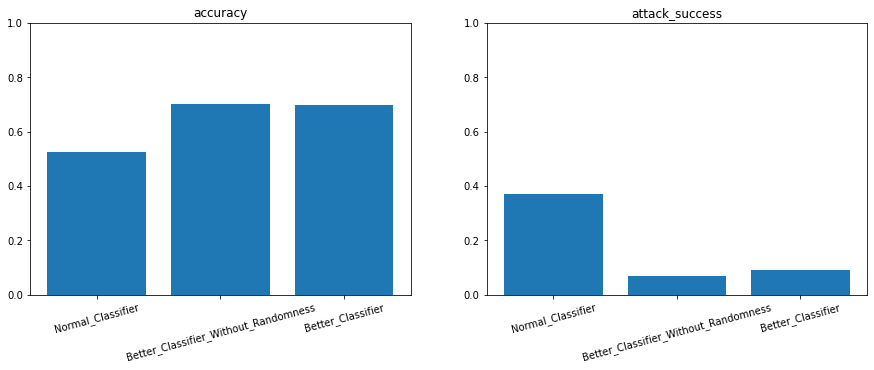

In [14]:
#1,000 Samples
x=Results('Test_Results/Over_1000_Iterations/06_FGSM_Untargeted_with_0.3_eps.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.6857999999999997, 'L_0': 97.73, 'L_1': 1.41, 'L_2': 1.17, 'L_Inf': 1.0, 'accuracy': 0.2, 'attack_success': 0.72, 'time': 0.015401709079742403} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.7316999999999997, 'L_0': 97.73, 'L_1': 1.41, 'L_2': 1.17, 'L_Inf': 1.0, 'accuracy': 0.71, 'attack_success': 0.17, 'time': 0.4138032960891724} 
 Better_Classifier :
 {'confidence': 0.7214999999999999, 'L_0': 97.73, 'L_1': 1.41, 'L_2': 1.17, 'L_Inf': 1.0, 'accuracy': 0.66, 'attack_success': 0.2, 'time': 0.368248724937439}


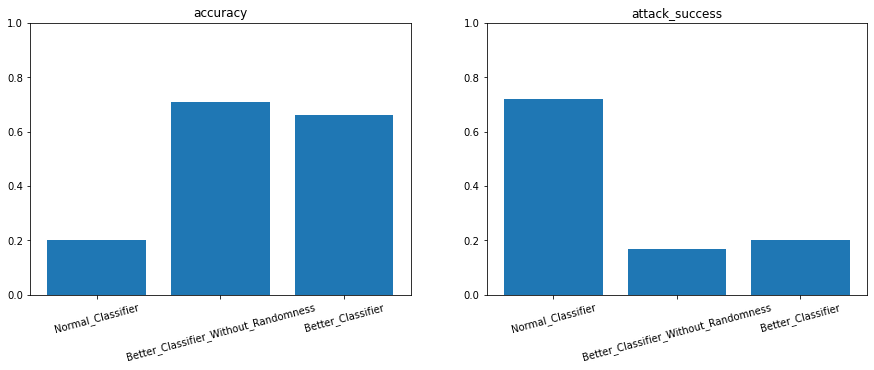

In [15]:
#100 Samples
x=Results('Test_Results/Over_100_Iterations/07_FGSM_Untargeted_with_1.0_eps.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.6447100000000008, 'L_0': 98.144, 'L_1': 1.367, 'L_2': 1.187, 'L_Inf': 1.0, 'accuracy': 0.229, 'attack_success': 0.666, 'time': 0.015343283176422116} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.6881900000000009, 'L_0': 98.141, 'L_1': 1.367, 'L_2': 1.187, 'L_Inf': 1.0, 'accuracy': 0.656, 'attack_success': 0.163, 'time': 0.41300609064102173} 
 Better_Classifier :
 {'confidence': 0.6934500000000003, 'L_0': 98.141, 'L_1': 1.367, 'L_2': 1.187, 'L_Inf': 1.0, 'accuracy': 0.631, 'attack_success': 0.175, 'time': 0.3633883397579193}


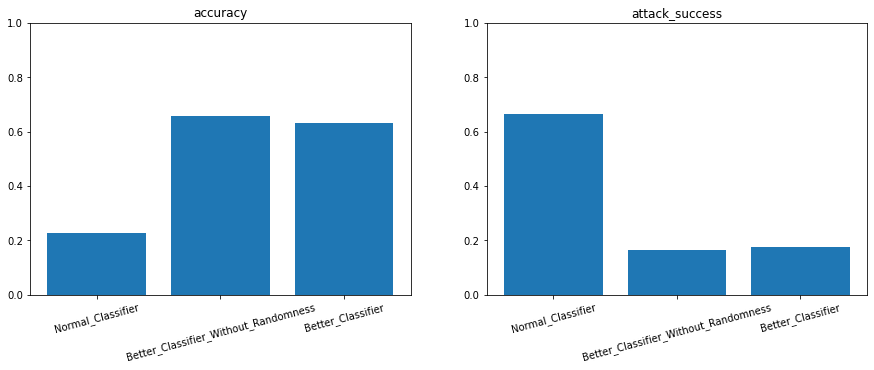

In [16]:
#1,000 Samples
x=Results('Test_Results/Over_1000_Iterations/07_FGSM_Untargeted_with_1.0_eps.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.5702000000000002, 'L_0': 97.73, 'L_1': 5.44, 'L_2': 4.68, 'L_Inf': 2.0, 'accuracy': 0.07, 'attack_success': 0.84, 'time': 0.016030678749084447} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.6553999999999996, 'L_0': 97.73, 'L_1': 5.44, 'L_2': 4.68, 'L_Inf': 2.0, 'accuracy': 0.45, 'attack_success': 0.45, 'time': 0.42430049180984497} 
 Better_Classifier :
 {'confidence': 0.6443000000000002, 'L_0': 97.73, 'L_1': 5.44, 'L_2': 4.68, 'L_Inf': 2.0, 'accuracy': 0.39, 'attack_success': 0.49, 'time': 0.36351057529449465}


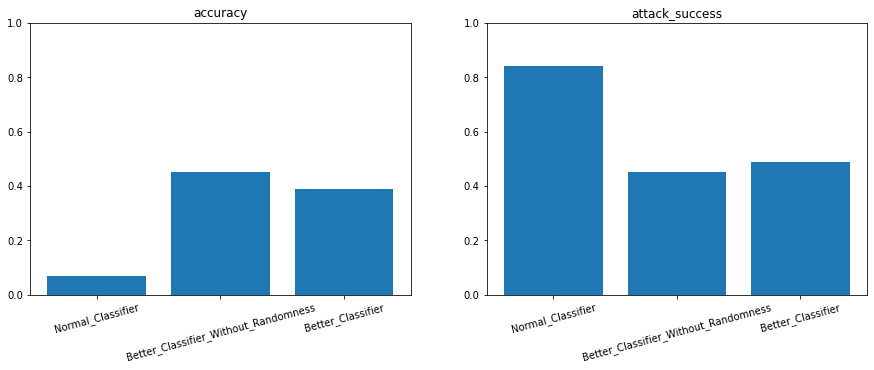

In [17]:
#100 Samples
x=Results('Test_Results/Over_100_Iterations/08_FGSM_Untargeted_with_5.0_eps.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])


 Normal_Classifier :
 {'confidence': 0.5738900000000002, 'L_0': 98.145, 'L_1': 5.312, 'L_2': 4.643, 'L_Inf': 2.0, 'accuracy': 0.1, 'attack_success': 0.785, 'time': 0.014732016086578365} 
 Better_Classifier_Without_Randomness :
 {'confidence': 0.6382000000000005, 'L_0': 98.142, 'L_1': 5.312, 'L_2': 4.643, 'L_Inf': 2.0, 'accuracy': 0.431, 'attack_success': 0.425, 'time': 0.4162360692024231} 
 Better_Classifier :
 {'confidence': 0.6274500000000008, 'L_0': 98.144, 'L_1': 5.313, 'L_2': 4.643, 'L_Inf': 2.0, 'accuracy': 0.378, 'attack_success': 0.45, 'time': 0.36363918089866637}


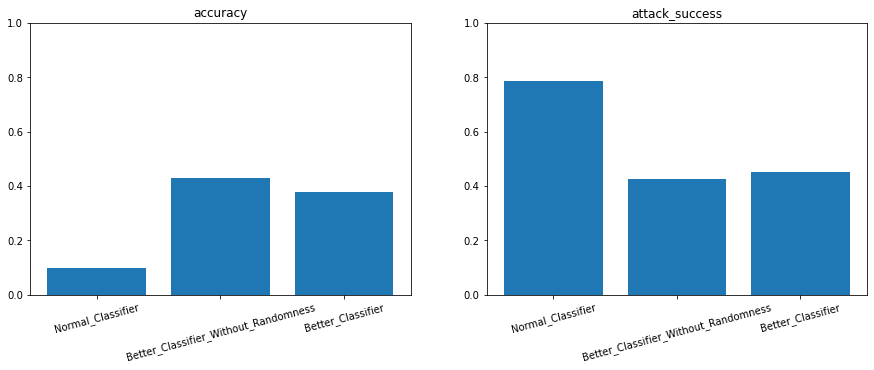

In [18]:
#1,000 Samples
x=Results('Test_Results/Over_1000_Iterations/08_FGSM_Untargeted_with_5.0_eps.csv') #Replace with the respective path
graph(x,['accuracy','attack_success'])